In [1]:
!pip install yfinance
!pip install matplotlib

In [5]:
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

In [3]:
def analyze_portfolio(tickers,weights,start_date,end_date):
  stock_data=yf.download(tickers,start=start_date,end=end_date)['Adj Close']
  stock_daily_return=stock_data.pct_change()
  portfolio_daily_return=(stock_daily_return*weights).sum(axis=1)
  portfolio_value=(1+portfolio_daily_return).cumprod()

  initial_investment=100000
  portfolio_values=initial_investment*portfolio_value
  final_portfolio_value=portfolio_value.iloc[-1]*initial_investment
  print('The final value of the portfolio is $'+str(final_portfolio_value))
  return portfolio_values


In [ ]:
#Analyze a portfolio
print('Enter 5 stocks(space separated)')
tickers=input().split()
print('Enter weights for the portfolio(space separated)')
weights=[float(w) for w in input().split()]
print('Enter start date in YYYY-MM-DD')
start_date=input()
print('Enter end date in YYYY-MM-DD')
end_date=input()
analyze_portfolio(tickers,weights,start_date,end_date)

Enter 5 stocks(space separated)
AAPL GOOGL MSFT AMZN TSL
Enter weights for the portfolio(space separated)
0.2 0.2 0.2 0.2 0.2
Enter start date in YYYY-MM-DD
2023-01-01
Enter end date in YYYY-MM-DD
2023-12-31


[*********************100%***********************]  5 of 5 completed


The final value of the portfolio is $183540.2016490617


,0
Date,
2023-01-03,100000.000000
2023-01-04,100185.739860
2023-01-05,97807.874361
2023-01-06,100211.506271
2023-01-09,102490.757500
...,...
2023-12-22,185215.066252
2023-12-26,185914.879185
2023-12-27,186387.201935


Enter 5 stocks(space separated)
AAPL GOOGL MSFT AMZN TSL
Enter weights for the portfolio 1(space separated)
0.1 0.3 0.2 0.1 0.3
Enter weights for the portfolio 2(space separated)
0.2 0.1 0.3 0.2 0.2
Enter start date in YYYY-MM-DD
2023-01-01
Enter end date in YYYY-MM-DD
2023-12-31


[*********************100%***********************]  5 of 5 completed
[*********************100%***********************]  5 of 5 completed


The final value of the portfolio is $196343.68645054253
The final value of the portfolio is $181231.18407364914


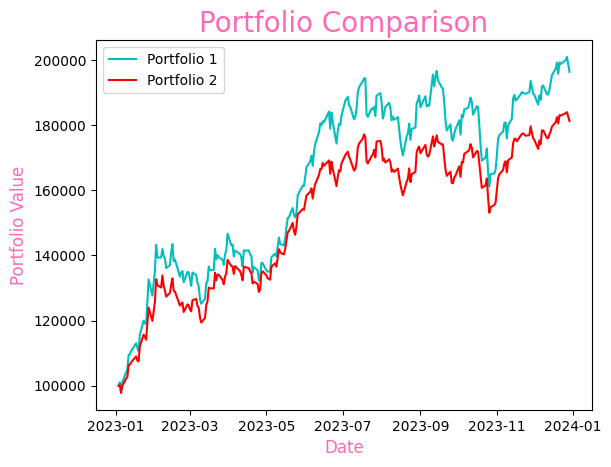

In [4]:
#Compare portfolio
print('Enter 5 stocks(space separated)')
tickers=input().split()
print('Enter weights for the portfolio 1(space separated)')
weights_1=[float(w) for w in input().split()]
print('Enter weights for the portfolio 2(space separated)')
weights_2=[float(w) for w in input().split()]
print('Enter start date in YYYY-MM-DD')
start_date=input()
print('Enter end date in YYYY-MM-DD')
end_date=input()

portfolio_values_1=analyze_portfolio(tickers,weights_1,start_date,end_date)
portfolio_values_2=analyze_portfolio(tickers,weights_2,start_date,end_date)

plt.plot(portfolio_values_1,color='c')
plt.plot(portfolio_values_2,color='r')
plt.xlabel('Date',color='hotpink',fontsize=12)
plt.ylabel('Portfolio Value',color='hotpink',fontsize=12)
plt.title('Portfolio Comparison',color='hotpink',fontsize=20)
plt.legend(['Portfolio 1','Portfolio 2'])

In [7]:
#Analyzing the compared portfolios
final_value_1=portfolio_values_1.iloc[-1]
final_value_2=portfolio_values_2.iloc[-1]

if final_value_1>final_value_2:
  print('Portfolio 1 has performed better than Portfolio 2 w.r.t to final portfolio values')

else:
  print('Portfolio 2 has performed better than portfolio 1 w.r.t to final portfolio values')

portfolio_cumulative_volatilty_1=portfolio_values_1.pct_change().std()*math.sqrt(252)
portfolio_cumulative_volatilty_2=portfolio_values_2.pct_change().std()*math.sqrt(252)

if portfolio_cumulative_volatilty_1>portfolio_cumulative_volatilty_2:
  print('Portfolio 1 has more volatility than Portfolio 2 and Therefore Portfolio 2 is more stable')
else:
  print('Portfolio 2 has more volatility than Portfolio 1 and Therefore Portfolio 1 is more stable')

Portfolio 1 has performed better than Portfolio 2 w.r.t to final portfolio values
Portfolio 1 has more volatility than Portfolio 2 and Therefore Portfolio 2 is more stable
